In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
 74% 49.0M/66.0M [00:01<00:00, 31.9MB/s]
100% 66.0M/66.0M [00:01<00:00, 59.9MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [4]:
def bagging(X_tr,y_tr,X_ts,y_ts):
    bag=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,random_state=0)
    bag.fit(X_tr,y_tr)
    y_pred = bag.predict(X_ts)
    #performance
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print('metrique personnalisée (MP): {0:0.5f}'.format(metric(y_ts,y_pred)))
    #matrice de confusion
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 15}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 15)
    plt.xlabel('Prédit',fontsize = 15)
    plt.ylabel('Réel',fontsize = 15)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

********** Bagging APRES RUS **********
Precision : 0.04124
Recall : 0.91089
F1 : 0.07890
roc_auc_score : 0.93664
metrique personnalisée (MP): 0.92558
\\Matrice de confusion ///:- 
 [[54722  2139]
 [    9    92]]


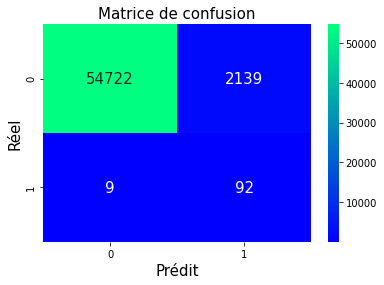

********** Bagging APRES ROS **********
Precision : 0.78431
Recall : 0.79208
F1 : 0.78818
roc_auc_score : 0.89585
metrique personnalisée (MP): 0.85127
\\Matrice de confusion ///:- 
 [[56839    22]
 [   21    80]]


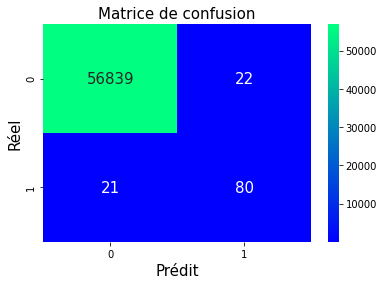

********** Bagging APRES SMOTE **********
Precision : 0.63566
Recall : 0.81188
F1 : 0.71304
roc_auc_score : 0.90553
metrique personnalisée (MP): 0.86530
\\Matrice de confusion ///:- 
 [[56814    47]
 [   19    82]]


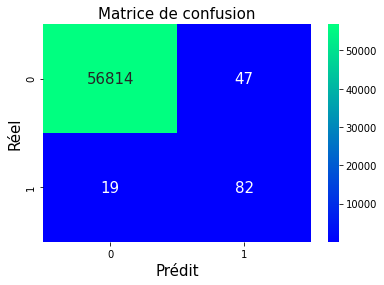

********** Bagging APRES ADASYN SMOTE **********
Precision : 0.57463
Recall : 0.76238
F1 : 0.65532
roc_auc_score : 0.88069
metrique personnalisée (MP): 0.82986
\\Matrice de confusion ///:- 
 [[56804    57]
 [   24    77]]


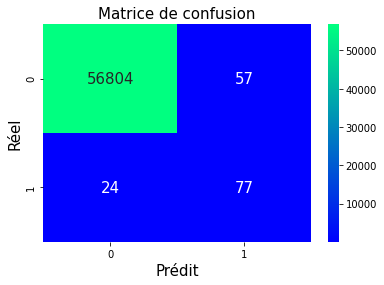

********** Bagging APRES BORDERLINE SMOTE **********
Precision : 0.78788
Recall : 0.77228
F1 : 0.78000
roc_auc_score : 0.88595
metrique personnalisée (MP): 0.83712
\\Matrice de confusion ///:- 
 [[56840    21]
 [   23    78]]


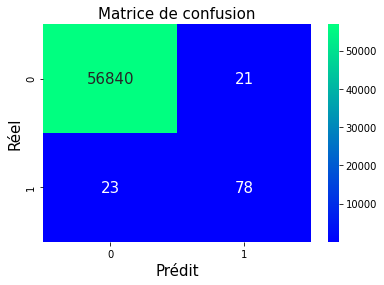

In [5]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))
x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#ré-echantillonnage des données d'apprentissage 
rus=RandomUnderSampler() #SOUS-ECHANTILLONNAGE ALEATOIRE
X_train_rus, y_train_rus = rus.fit_sample(X_train, Y_train)

ros=RandomOverSampler() #SUR-ECHANTILLONNAGE ALEATOIRE
X_train_ros, y_train_ros = ros.fit_sample(X_train, Y_train)

smt=SMOTE() #SMOTE
X_train_smt, y_train_smt = smt.fit_sample(X_train, Y_train)

ada=ADASYN() #ADASYN-SMOTE
X_train_ada, y_train_ada = ada.fit_sample(X_train, Y_train)

Bl=BorderlineSMOTE() #BORDERLINE-SMOTE
X_train_Bl, y_train_Bl = Bl.fit_sample(X_train, Y_train)

print("*"*10,"Bagging APRES RUS","*"*10)
bagging(X_train_rus,y_train_rus,X_test,Y_test)
print("*"*10,"Bagging APRES ROS","*"*10)
bagging(X_train_ros,y_train_ros,X_test,Y_test)
print("*"*10,"Bagging APRES SMOTE","*"*10)
bagging(X_train_smt,y_train_smt,X_test,Y_test)
print("*"*10,"Bagging APRES ADASYN SMOTE","*"*10)
bagging(X_train_ada,y_train_ada,X_test,Y_test)
print("*"*10,"Bagging APRES BORDERLINE SMOTE","*"*10)
bagging(X_train_Bl,y_train_Bl,X_test,Y_test)
